# **1. Importación de *modules***

In [521]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# **2. Importación del dataset *properatti_tp2.csv***

In [522]:
data = pd.read_csv("../data/properatti_tp2.csv", sep = ",", low_memory=False) 
data.head(3)
data.shape

,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,am_garage,am_balcon,am_parrilla,am_piscina,am_terraza,am_patio,...,pn_Villa de Mayo,pn_Villa del Parque,pn_Village Golf & Tennis Country Club,pn_Virasoro Village,pn_Virrey del Pino,pn_Virreyes,pn_Wilde,pn_William Morris,pn_Zelaya,pn_coordenadas 34.255511
0,55.0,40.0,1127.272727,2.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,55.0,55.0,1309.090909,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,106.0,78.0,1226.415094,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


(41760, 467)

# **3. Tratamiento de los datos**

<AxesSubplot:>

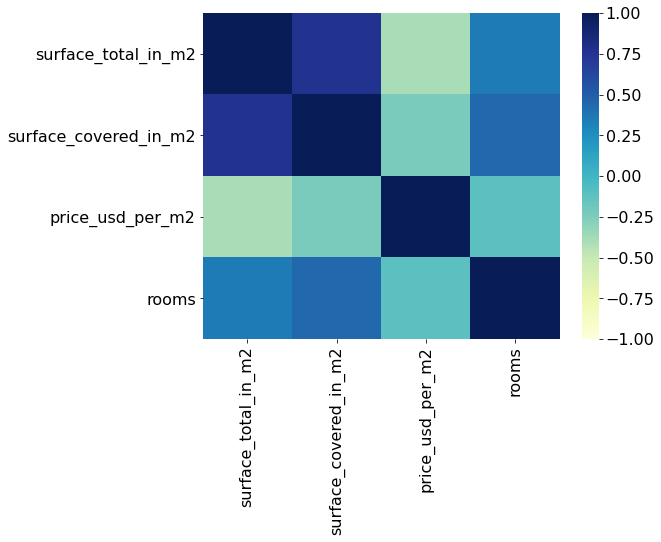

In [523]:
# Definimos parámetros globales para matplotlib.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 16
sns.heatmap(data.iloc[:, :4].corr(), vmin = -1, vmax = 1, center = 0, cmap = "YlGnBu", annot = True)

# **4.Modelos**

## Creo una función que ingreso features y devuelve el MAE  train_test_mae

In [524]:
# Definimos una función que acepta una lista de features, hace el split entre train y test,
# reservando un 25% de las observaciones para testeo, y devuelve la prueba MAE.

def train_test_mae(feature_cols):
    X = data[feature_cols]
    y = data.price_usd_per_m2
    # Como estamos trabajando con observaciones ordenadas en el tiempo, ponemos
    # shuffle=False para evitar data leakage
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return metrics.mean_absolute_error(y_test, y_pred)


In [525]:
train_test_mae(['surface_total_in_m2','surface_covered_in_m2','rooms'])

705.1883861779858

In [526]:
train_test_mae(['surface_total_in_m2'])

697.9425238951077

In [527]:
train_test_mae(['surface_covered_in_m2'])

724.2764619697847

In [528]:
train_test_mae(['rooms'])

759.8550278142445

## **4.1 Regresión lineal simple (RLS)**

#### 4.1.1 funcion rls_func

In [529]:
def rls_func(X,y,columna):
    # Como estamos trabajando con observaciones ordenadas en el tiempo, ponemos
    # shuffle=False para evitar data leakage    shuffle=False
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 1, shuffle = False)
    lm = LinearRegression() # Fiteamos el modelo sobre los vectores X e y.
    model = lm.fit(Xtrain, ytrain)
    print(f'''    Coef\t{model.coef_}''')
    print(f'''    intercept\t{model.intercept_}''')
    test_sklearn = np.array(Xtest).reshape(-1,1)
    ypred = model.predict(test_sklearn)
    
    print(f'''    MAE\t{mean_absolute_error(ytest, ypred).round(2)}
    MSE\t{mean_squared_error(ytest, ypred).round(2)}
    RMSE\t{np.sqrt(mean_squared_error(ytest, ypred)).round(2)}
    R2\t{r2_score(ytest, ypred).round(2)}
    ''')

    sns.regplot(data = data, x = columna, y = 'price_usd_per_m2', ci = 95, scatter_kws = {"color": "blue", 's': 10}, line_kws = {"color": "red"})
    #return metrics.mean_absolute_error(y_test, y_pred)


### Regresión lineal simple (RLS) de a una feature a la vez **sin normalización**

#### 4.1.2 scater plot

Text(0.5, 0, 'SurfTot ')

Text(0, 0.5, 'PUPM ')

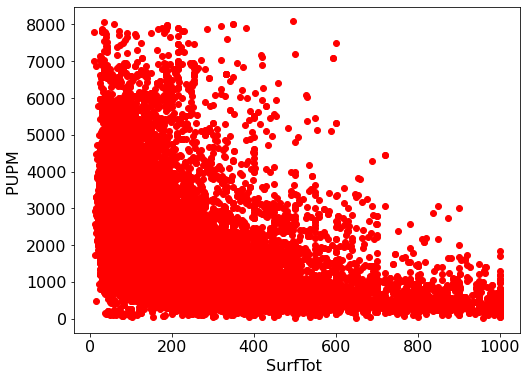

In [530]:
#surface_total_in_m2
xs = data[["surface_total_in_m2"]]
ys = data["price_usd_per_m2"]

plt.scatter(xs, ys, color='r')
plt.xlabel("SurfTot ")
plt.ylabel("PUPM ")
plt.show()

#### 4.1.3 Superficie total

*** Superficie total ***
surface_total_in_m2
    Coef	[-2.55169521]
    intercept	2444.4350213714215
    MAE	697.94
    MSE	959607.11
    RMSE	979.6
    R2	0.08


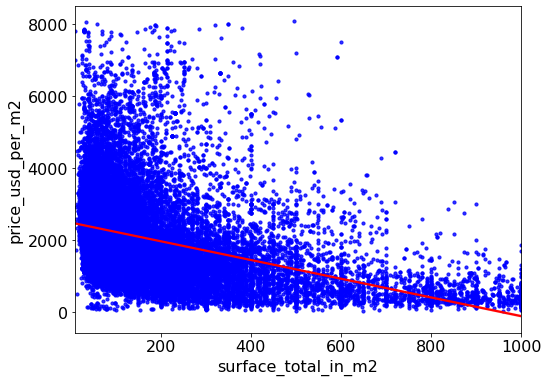

In [531]:
# Superficie total
print("*** Superficie total ***")
X = data[['surface_total_in_m2']]
y = data['price_usd_per_m2']
rls_func(X,y,'surface_total_in_m2')


#### 4.1.4 Superficie cubierta

*** Superficie cubierta ***
surface_covered_in_m2
    Coef	[-2.59902542]
    intercept	2329.6847507329676
    MAE	724.28
    MSE	1034446.39
    RMSE	1017.08
    R2	0.01


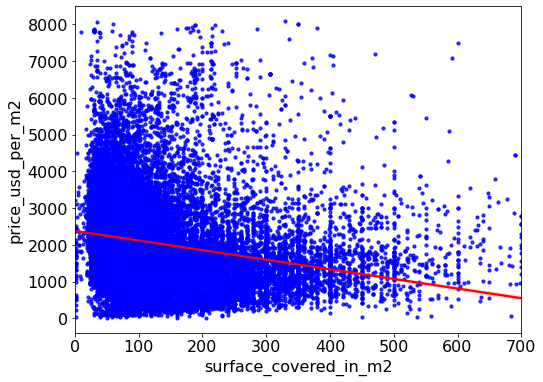

In [532]:
# Superficie cubierta
print("*** Superficie cubierta ***")
X = data[['surface_covered_in_m2']]
y = data['price_usd_per_m2']
rls_func(X,y,'surface_covered_in_m2')


#### 4.1.5 Habitaciones

*** rooms ***
rooms
    Coef	[-108.41659793]
    intercept	2329.364270044032
    MAE	759.86
    MSE	1096150.33
    RMSE	1046.97
    R2	-0.05


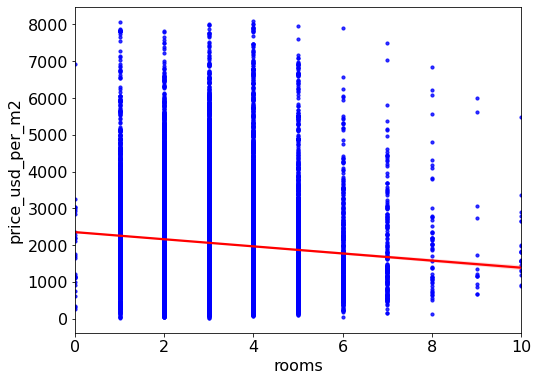

In [533]:
# Habitaciones
print("*** rooms ***")
X = data[['rooms']]
y = data['price_usd_per_m2']
rls_func(X,y,'rooms')

### RLS a una feature a la vez **normalizando** (usando Scale)

#### 4.1.6 scater plot

Text(0.5, 0, 'SurfTot standardized')

Text(0, 0.5, 'PUPM standardized')

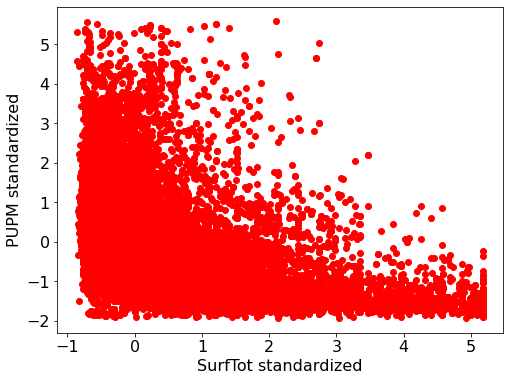

In [534]:
#Normalizo con surface_total_in_m2
xs = preprocessing.scale(data[["surface_total_in_m2"]])
ys = preprocessing.scale(data["price_usd_per_m2"])

plt.scatter(xs, ys, color='r')
plt.xlabel("SurfTot standardized")
plt.ylabel("PUPM standardized")
plt.show()

#### 4.1.7 Superficie total

*** Superficie total con  Normalizacion  ***
surface_total_in_m2
    Coef	[-0.38994141]
    intercept	-0.031863835343525895
    MAE	0.65
    MSE	0.83
    RMSE	0.91
    R2	0.08


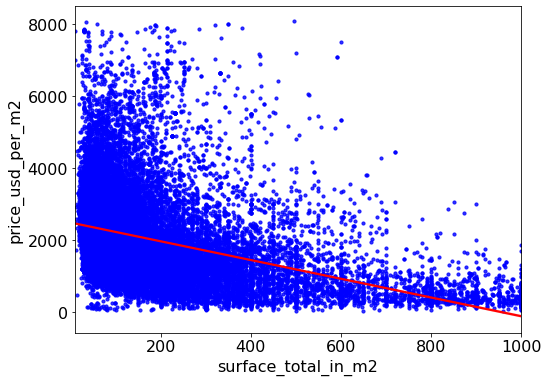

In [535]:
# Normalizo con surface_total_in_m2
print("*** Superficie total con  Normalizacion  ***")
X = preprocessing.scale(data[["surface_total_in_m2"]])
y = preprocessing.scale(data["price_usd_per_m2"])
rls_func(X,y,'surface_total_in_m2')

Comparando los resultados de la regresion lineal simple usando surface_total_in_m2 con y sin normalizacion se tiene:
Sin normalización: 
- MAE	700.94
- MSE	944445.18
- RMSE	971.83
- R2	0.16

Con Normalización
- MAE	0.65
- MSE	0.82
- RMSE	0.91
- R2	0.16

#### 4.1.8 Superficie cubierta

*** Superficie totalcon  Normalizacion  ***
surface_covered_in_m2
    Coef	[-0.2316544]
    intercept	-0.046991264439856045
    MAE	0.67
    MSE	0.9
    RMSE	0.95
    R2	0.01


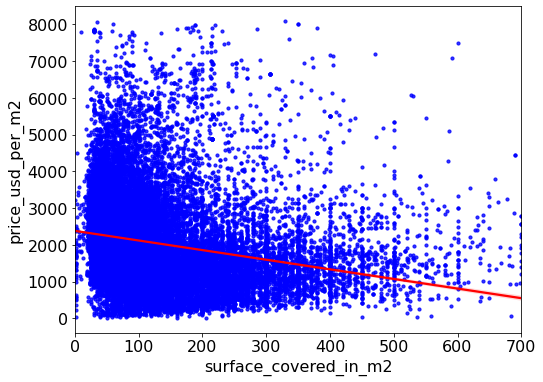

In [536]:
# Normalizo con ssurface_covered_in_m2
print("*** Superficie totalcon  Normalizacion  ***")
X = preprocessing.scale(data[["surface_covered_in_m2"]])
y = preprocessing.scale(data["price_usd_per_m2"])
rls_func(X,y,'surface_covered_in_m2')

#### 4.1.9 Habitaciones

*** Rooms  ***
rooms
    Coef	[-0.12298565]
    intercept	-0.05134428905638345
    MAE	0.71
    MSE	0.95
    RMSE	0.98
    R2	-0.05


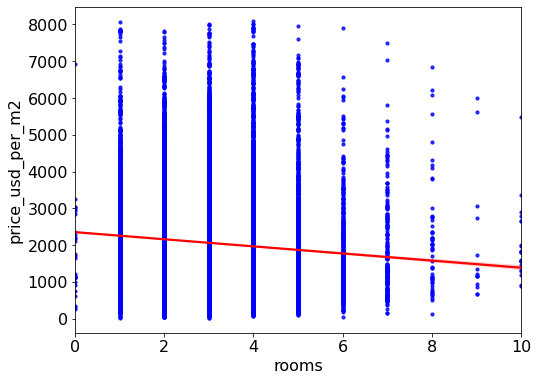

In [537]:
# Normalizo con rooms
print("*** Rooms  ***")
X = preprocessing.scale(data[["rooms"]])
y = preprocessing.scale(data["price_usd_per_m2"])
rls_func(X,y,'rooms')

## **4.3 Regresión lineal múltiple (RLM)**

### 4.3.1 funcion que tome features y aplique RLM (rlm_func y rlm_func_orig)

In [571]:
# Definimos una función que acepta una lista de features, hace el split entre train y test,
# reservando un 25% de las observaciones para testeo, y devuelve la prueba MAE.

def rlm_func(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    #test_sklearn = np.array(Xtest).reshape(-1,1)
    #linreg.predict(test_sklearn)
    y_pred = linreg.predict(X_test)
        
    n = len(y_train)
    p = X_train.shape[1]
    print(p)
    R2 = metrics.r2_score(y_test, y_pred)
    R2_ajustado = 1 - (1 - R2)*((n-1)/(n - p - 1))
    
    print(f'''    
    Intercepto\t{linreg.intercept_.round(4)}
    MAE\t\t{mean_absolute_error(y_test, y_pred).round(4)}
    MSE\t\t{mean_squared_error(y_test, y_pred).round(4)}
    RMSE\t{np.sqrt(mean_squared_error(y_test, y_pred)).round(4)}
    R2\t\t{R2}
    R2ADJ\t{R2_ajustado}
    ''')

    #plt.plot(y,y, '-.',c='grey')
    #plt.scatter(y_pred, y, s=30, c='r', marker='+', zorder=10)
    #plt.xlabel("Predicciones usando todas las variables")
    #plt.ylabel("Valores reales ")
    #plt.show()

In [575]:
def rlm_func_orig(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
    linreg = LinearRegression()
    linreg.fit(X, y)
    y_pred = linreg.predict(X)
    
    print(f'''    
    Intercepto\t{linreg.intercept_.round(4)}
    MAE\t\t{mean_absolute_error(y, y_pred).round(4)}
    MSE\t\t{mean_squared_error(y, y_pred).round(4)}
    RMSE\t{np.sqrt(mean_squared_error(y, y_pred)).round(4)}
    R2\t\t{r2_score(y, y_pred).round(4)}
    ''')
    #    Coef\t{linreg.coef_.round(4)}
    
    plt.plot(y,y, '-.',c='grey')
    plt.scatter(y_pred, y, s=30, c='r', marker='+', zorder=10)
    plt.xlabel("Predicciones usando todas las variables")
    plt.ylabel("Valores reales ")
    plt.show()

### 4.3.2 RLM con las 3 features originales juntas **sin normalización**

In [573]:
feature_cols =['surface_total_in_m2','surface_covered_in_m2','rooms']
X = data[feature_cols]
y = data.price_usd_per_m2
rlm_func(X,y)

    
    Intercepto	2383.5634
    MAE		705.1884
    MSE		954164.5861
    RMSE	976.8135
    R2		0.0867
    


    
    Intercepto	2400.626
    MAE		711.1531
    MSE		954469.8835
    RMSE	976.9697
    R2		0.1722
    


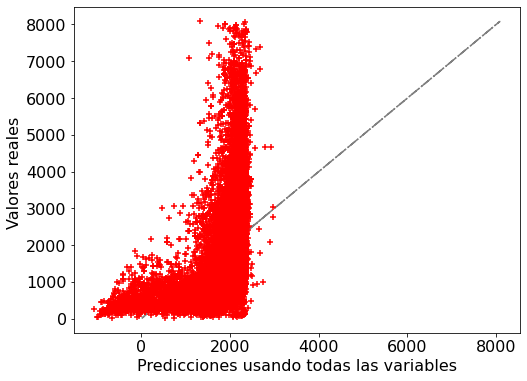

In [576]:
feature_cols =['surface_total_in_m2','surface_covered_in_m2','rooms']
X = data[feature_cols]
y = data.price_usd_per_m2
rlm_func_orig(X,y)

### 4.3.3 RLM con las 3 features originales juntas **Con normalización**  (usando Scale)

In [552]:
feature_cols =['surface_total_in_m2','surface_covered_in_m2','rooms']
xs_orig = preprocessing.scale(data[feature_cols])
ys_orig = preprocessing.scale(data["price_usd_per_m2"])

rlm_func(xs_orig,ys_orig)

    
    Intercepto	-0.0299
    MAE		0.6567
    MSE		0.8275
    RMSE	0.9097
    R2		0.0867
    


    
    Intercepto	0.0
    MAE		0.6623
    MSE		0.8278
    RMSE	0.9098
    R2		0.1722
    


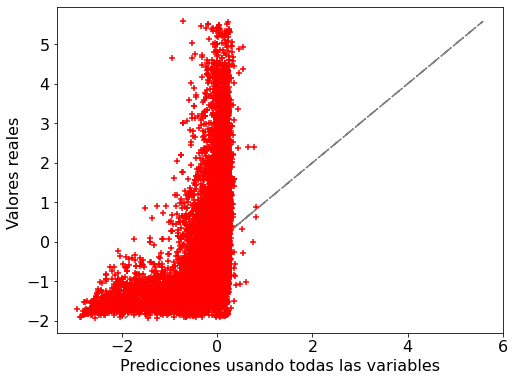

In [553]:
feature_cols =['surface_total_in_m2','surface_covered_in_m2','rooms']
xs_orig = preprocessing.scale(data[feature_cols])
ys_orig = preprocessing.scale(data["price_usd_per_m2"])

rlm_func_orig(xs_orig,ys_orig)

###  4.3.4 RLM con TODOS los features (dummies incluidos) **sin normalizar**

In [554]:
# Hacemos un modelo utilizando todos los features
X_todo = data.drop("price_usd_per_m2", axis=1)
#X_todo = data[data.columns.difference(["price_usd_per_m2"])]
y_todo = data['price_usd_per_m2']
rlm_func(X_todo,y_todo)

    
    Intercepto	1572.6807
    MAE		162491311.4878
    MSE		6.208059219830491e+19
    RMSE	7879123821.7396
    R2		-59424716011714.56
    


    
    Intercepto	1509.3287
    MAE		431.3277
    MSE		392026.3324
    RMSE	626.1201
    R2		0.66
    


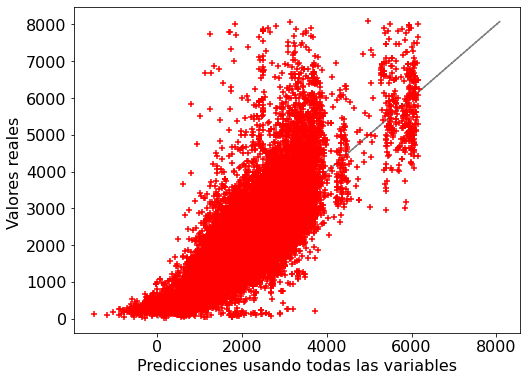

In [555]:
# Hacemos un modelo utilizando todos los features
X_todo = data.drop("price_usd_per_m2", axis=1)
#X_todo = data[data.columns.difference(["price_usd_per_m2"])]
y_todo = data['price_usd_per_m2']
rlm_func_orig(X_todo,y_todo)

### 4.3.5 RLM con TODOS los features (dummies incluidos) **con normalizacion**  (usando Scale)

In [556]:
X_todo = preprocessing.scale(data.drop("price_usd_per_m2", axis=1))
#X_todo = preprocessing.scale(data[data.columns.difference(["price_usd_per_m2"])])
y_todo = preprocessing.scale(data['price_usd_per_m2'])
rlm_func(X_todo,y_todo)

    
    Intercepto	-4180768300.4419
    MAE		52451985281.8766
    MSE		6.168589168304743e+24
    RMSE	2483664463711.784
    R2		-6.808241105778512e+24
    


    
    Intercepto	0.0
    MAE		0.4017
    MSE		0.34
    RMSE	0.5831
    R2		0.66
    


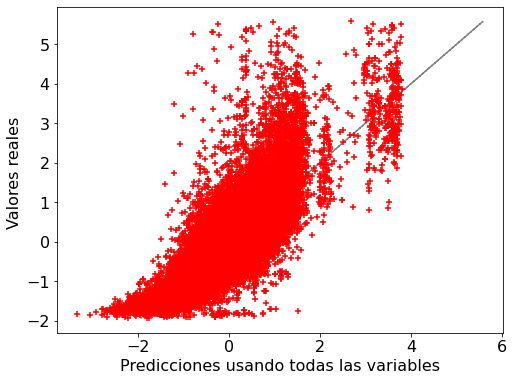

In [557]:
# Hacemos un modelo utilizando todos los features
X_todo = preprocessing.scale(data.drop("price_usd_per_m2", axis=1))
#X_todo = preprocessing.scale(data[data.columns.difference(["price_usd_per_m2"])])
y_todo = preprocessing.scale(data['price_usd_per_m2'])
rlm_func_orig(X_todo,y_todo)

###  **<font color='red'>4.4 Siguientes pasos regularización </font>**

### Ridge Regression

In [147]:
X = data[['surface_total_in_m2','surface_covered_in_m2','rooms']]
y = data[['price_usd_per_m2']]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Instanciamos el modelo.
lm = LinearRegression()
# Fiteamos el modelo sobre los vectores xs_orig e ys_orig.
model = lm.fit(X_train, y_train)
# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
ypred = lm.predict(X_test)

#Modelo Ridge
ridge = linear_model.Ridge(alpha=0.5, normalize=True)
ridge.fit(X_train,y_train)
ypred_ridge = ridge.predict(X_test)

print ('R2:', metrics.r2_score(y_test, ypred))
print ("R2_Ridge:", metrics.r2_score(y_test, ypred_ridge))

Ridge(alpha=0.5, normalize=True)

R2: 0.1734622947875608
R2_Ridge: 0.13961366936203423


In [149]:
# Veamos los coeficientes de la regresión Ridge:    
ridge.coef_

array([[-1.63996167, -0.24479074, -6.05846167]])

### Regression Lasso

In [148]:
X = data[['surface_total_in_m2','surface_covered_in_m2','rooms']]
y = data[['price_usd_per_m2']]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Instanciamos el modelo lineal
lm = LinearRegression()
# Fiteamos el modelo sobre los vectores xs_orig e ys_orig.
model = lm.fit(X_train, y_train)
# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
ypred = lm.predict(X_test)

#Modelo Lasso
lasso = linear_model.Lasso(alpha=0.5, normalize=True)
lasso.fit(X_train,y_train)
ypred_lasso = lasso.predict(X_test)

print ('R2:', metrics.r2_score(y_test, ypred))
print ("R2_Lasso:", metrics.r2_score(y_test, ypred_lasso))

Lasso(alpha=0.5, normalize=True)

R2: 0.1761361344487128
R2_Lasso: 0.15512649362637165


In [150]:
# Veamos los coeficientes de la regresión Lasso:    
lasso.coef_

array([-2.05064723,  0.        ,  0.        ])

### Elastic Net

In [ ]:
X = data[['surface_total_in_m2','surface_covered_in_m2','rooms']]
y = data[['price_usd_per_m2']]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Instanciamos el modelo lineal
lm = LinearRegression()
# Fiteamos el modelo sobre los vectores xs_orig e ys_orig.
model = lm.fit(X_train, y_train)
# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
ypred = lm.predict(X_test)

#Modelo elastic Net
elastic_net = linear_model.ElasticNet(alpha=0.5, normalize=True)
elastic_net.fit(X_train, y_train)
ypred_elastic = elastic_net.predict(X_test)

plt.scatter(X_train, y_train)
plt.title("Muestra de datos #1")
plt.scatter(X_train, ypred, c='r')

print ('R2:', metrics.r2_score(y_test, ypred))
print ("R2_Elastic:", metrics.r2_score(y_test, ypred_elastic))

In [ ]:
# Veamos los coeficientes de la regresión ElasticNet:
elastic_net.coef_

## CV optimización Lambda

In [ ]:
# instanciamos un modelo 
rlmcv = linear_model.RidgeCV(alphas=np.linspace(0.1,100, 1000), cv=3, normalize=True,scoring='r2')


# Ajustamos nuevamente nuestro modelo, esta vez con RidgeCV
X = np.vander(xs, 4)[:,:-1]
y = ys
rlmcv.fit(X, y)
predictions = rlmcv.predict(X)

plt.scatter(xs, ys)
plt.title("Muestra de datos #1")
plt.scatter(xs, predictions, c='r')
plt.show()
print ("r^2:", rlmcv.score(X, ys))
print ("alpha:", rlmcv.alpha_)

X = np.vander(xs2, 4)[:,:-1]
predictions = rlmcv.predict(X)

plt.scatter(xs2, ys2)
plt.title("Muestra de datos #2")
plt.scatter(xs2, predictions, c='r')
plt.show()
print ("r^2:", rlmcv.score(X, ys2))

In [ ]:
lassocv = linear_model.LassoCV(alphas=np.linspace(0.01,100, 1000), cv=3, normalize=True)
xs, ys = generate_data()


# Ajustamos nuevamente nuestro modelo, esta vez con LassoCV
X = np.vander(xs, 4)[:,:-1]
y = ys
lassocv.fit(X, y)
predictions = lassocv.predict(X)

plt.scatter(xs, ys)
plt.title("Muestra de datos #1")
plt.scatter(xs, predictions, c='r')
plt.show()
print ("r^2:", lassocv.score(X, ys))
print ("alpha:", lassocv.alpha_)

X = np.vander(xs2, 4)[:,:-1]
predictions = lassocv.predict(X)

plt.scatter(xs2, ys2)
plt.title("Muestra de datos #2")
plt.scatter(xs2, predictions, c='r')
plt.show()
print ("r^2:", lassocv.score(X, ys2))

In [ ]:
# Definimos el rango de de búsqueda del hiperparametro explicitamente
lm_lasso = linear_model.LassoCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10],\
                                        normalize = False, cv = 5) 

model_cv = lm_lasso.fit(X_train, y_train)

model_cv.score(X_train, y_train)

model_cv.coef_
model_cv.intercept_
model_cv.alpha_
model_cv.score(X_train, y_train)

In [ ]:
best_alpha = model_cv.alpha_

#L1_wt : 0, the fit is ridge regression. 1, the fit is the lasso 

no_reg_model = sm.OLS(y_train, X_train_sm)

reg_model = no_reg_model.fit_regularized(alpha = best_alpha, L1_wt = 1)

reg_model.params
sns.scatterplot(x=reg_model.params, y=no_reg_model_params);

reg_residuals = y_train - reg_model.fittedvalues

linear_residuals = y_train - model.fittedvalues

sns.scatterplot(x = reg_residuals, y = linear_residuals)

In [ ]:
sm_prediction = reg_model.predict(X_test_sm)
sm_prediction

In [ ]:
skl_lasso = linear_model.Lasso(alpha = best_alpha, fit_intercept=True, normalize=False)

skl_lasso = skl_lasso.fit(X= X_train, y = y_train)

skl_prediction = skl_lasso.predict(X_test)

In [ ]:
skl_residuals = y_test - skl_prediction

sm_residuals = y_test - sm_prediction

sns.scatterplot(x = skl_residuals, y = sm_residuals)

In [ ]:

lasso_coef = np.insert(skl_lasso.coef_, 0, skl_lasso.intercept_)

sns.scatterplot(x = lasso_coef, y = reg_model.params);


In [ ]:
eval_measures.rmse(y_test, sm_prediction)
eval_measures.meanabs(y_test, sm_prediction)
metrics.r2_score(y_test, sm_prediction)
np.sqrt(metrics.mean_squared_error(y_test, skl_prediction))
metrics.mean_absolute_error(y_test, skl_prediction)
metrics.r2_score(y_test, skl_prediction)